In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
df = pd.read_csv('zepto.csv')

In [5]:
df.head(10)

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250
5,Fruits & Vegetables,Potato,3500,17,3,2900,1000,False,1
6,Fruits & Vegetables,Lemon,7500,16,3,6300,200,False,200
7,Fruits & Vegetables,Watermelon,5800,15,3,4900,58,False,1
8,Fruits & Vegetables,Capsicum Green,2300,17,3,1900,250,False,250
9,Fruits & Vegetables,Chilli Green,1900,15,3,1600,100,False,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [8]:
df.describe(include = 'all')

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
count,3732,3732,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732,3732.000000
unique,14,1681,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Cooking Essentials,Mother's Recipe Tamarind Paste,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,514,10,NaN,NaN,NaN,NaN,NaN,3279,NaN
mean,NaN,NaN,15680.117899,7.617095,4.008574,14192.834941,387.843783,NaN,213.270900
std,NaN,NaN,16088.807618,9.211733,2.203511,13850.726265,678.096509,NaN,194.730976
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,6000.000000,0.000000,2.000000,5500.000000,100.000000,NaN,50.000000
50%,NaN,NaN,11000.000000,6.000000,5.000000,10400.000000,225.000000,NaN,186.000000
75%,NaN,NaN,20000.000000,10.000000,6.000000,18400.000000,450.000000,NaN,340.000000


In [9]:
df.isnull().sum()

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

In [12]:
df.columns

Index(['Category', 'name', 'mrp', 'discountPercent', 'availableQuantity',
       'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity'],
      dtype='object')

In [13]:
df.duplicated().sum()

2

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [17]:
df.columns

Index(['category', 'name', 'mrp', 'discountpercent', 'availablequantity',
       'discountedsellingprice', 'weightingms', 'outofstock', 'quantity'],
      dtype='object')

Bar Chart – Top 10 Categories by Average Price

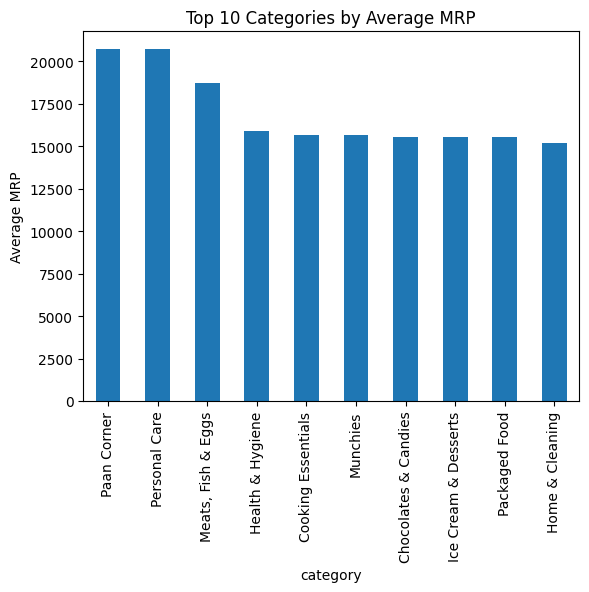

In [18]:
plt.figure()
df.groupby('category')['mrp'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Categories by Average MRP")
plt.ylabel("Average MRP")
plt.show()

Histogram – MRP Distribution

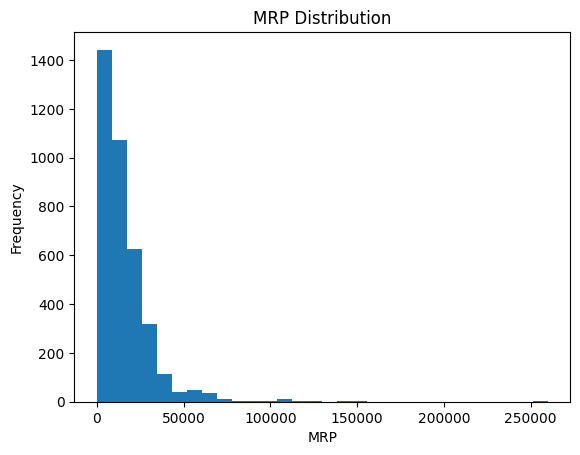

In [20]:
plt.figure()
plt.hist(df['mrp'], bins=30)
plt.title("MRP Distribution")
plt.xlabel("MRP")
plt.ylabel("Frequency")
plt.show()

Box Plot – Discount Percent

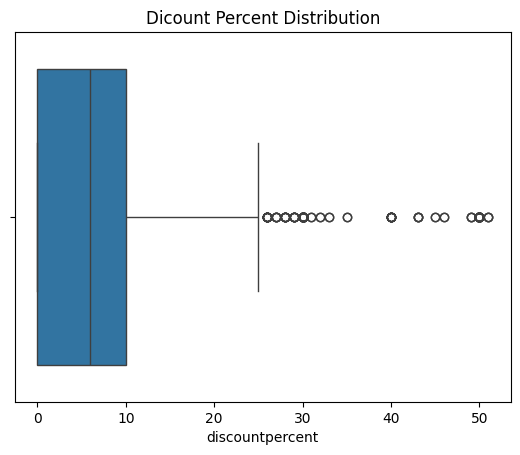

In [21]:
plt.figure()
sns.boxplot(x=df['discountpercent'])
plt.title("Dicount Percent Distribution")
plt.show()

 Scatter Plot – Weight vs Selling Price

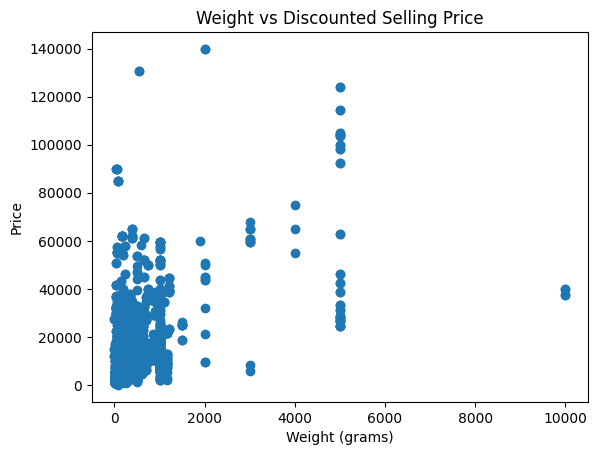

In [22]:
plt.figure()
plt.scatter(df['weightingms'], df['discountedsellingprice'])
plt.title("Weight vs Discounted Selling Price")
plt.xlabel("Weight (grams)")
plt.ylabel("Price")
plt.show()

Pie Chart – Stock Status

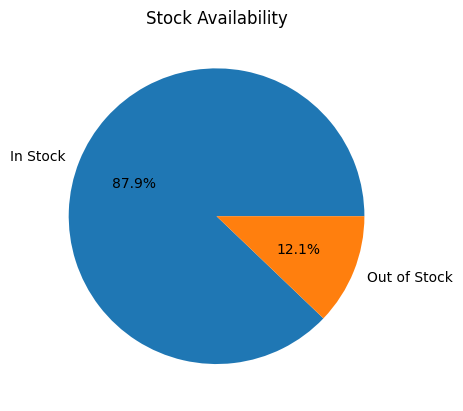

In [24]:
plt.figure()
df['outofstock'].value_counts().rename(
    {True: 'Out of Stock', False: 'In Stock'}
).plot(kind='pie', autopct='%1.1f%%')

plt.title("Stock Availability")
plt.ylabel("")
plt.show()